<a href="https://colab.research.google.com/github/SalhRosas/Pepperdine/blob/main/Rosas_Salvador_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



# **Homework 1:**


---


- Please complete each of the problems below
- Show all your code to complete each question
- Provide sentence(s) explaining your solution
- For your decision tree, please be sure to output the actual image directly in python as opposed to a .dot file


It is recommended that you read chapters 3, 4, and 6 to prepare for this module!

**Please use the following dataset for problems 1 - 6**





In [14]:

import pandas as pd

URL_adult='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Adult'
adult = pd.read_csv(URL_adult, sep=',')
len(adult)


25000

In [15]:
#Removing unwanted characters in data
adult = adult[(adult.astype(str) != '?').all(axis=1)]
len(adult) #23171

23171

**1. Partition the data set, so that 50% of the records are included in the training data set and 50% are included in the test data set.  Use a bar graph to conifrm your proportions**





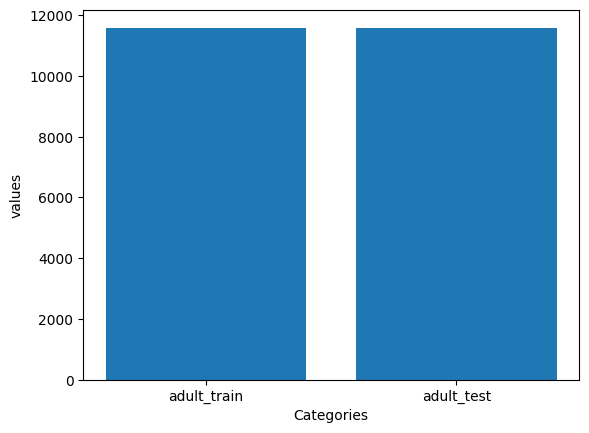

In [16]:
### Show your Code Here ###
from sklearn.model_selection import train_test_split
import random

adult_train, adult_test = train_test_split(adult, test_size = 0.5, random_state = 5) #50% test_data and 50% training_data partition
adult_train.shape

import numpy as np
categories = np.array(["adult_train", "adult_test"])
sizes = np.array([len(adult_train), len(adult_test)])

import matplotlib.pyplot as plt
plt.bar(categories, sizes)
plt.ylabel("values")
plt.xlabel("Categories")
plt.show()

Provide sentence(s) explaining your solution

**2. Identify the total number of records in the training data set, and how many records in the training data set have an income value of < 50k**

In [17]:
### Show your Code Here ###
adult_train.shape #We now have 12,500 records half of the total 25k from Q1 above


(11585, 15)

In [18]:
adult_train['income'].value_counts()
#adult_train_income_count 

<=50K.    8687
>50K.     2898
Name: income, dtype: int64

We now have 12,500 records half of the total 25k from Q1 above
There are 9,472 recorded individuals with an income value of <=50k

**3. Use your answers from the previous excercise to calculate how many records with income >50k you need to resmaple in order to have 35% of the rebalanced data set have incomes of >50k**

In [9]:
### Show your Code Here ###
x= (0.35*(12500)-3028)/0.65 #x=2072
x

2072.3076923076924

In [10]:
#our_resample = to_resample.sample( n= 2072, replace = True)
#our_resample

To rebalance the training data we need to sample 2072 records from the records with income >50K.

**4. Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50k**

In [19]:
to_resample = adult_train.loc[adult_train["income"]==">50K."]
to_resample

our_resample = to_resample.sample(n = 2072, replace =True)
our_resample



adult_train_rebal =pd.concat([adult_train, our_resample])
adult_train_rebal.shape

(13657, 15)

In [20]:
#adult.replace('?', np.NaN, inplace =True)
adult.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [21]:
# Rebalancing 
adult_train_rebal['income'].value_counts()

<=50K.    8687
>50K.     4970
Name: income, dtype: int64

The total number of records with the income > 50K is 5100. 

**5. Validate your partition by performing a two-sample Z-test for the difference in means for the mean age in the training set versus the mean age in the test set?**

<Axes: ylabel='Frequency'>

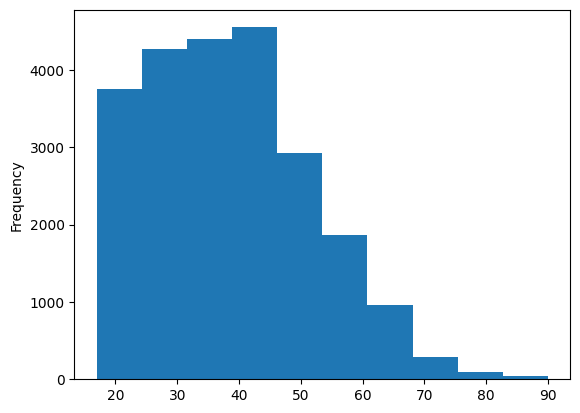

In [22]:
### Show your Code Here ###
from scipy import stats
adult['age_z']=stats.zscore(adult['age'])

adult

adult["age"].plot(kind='hist')



<Axes: ylabel='Frequency'>

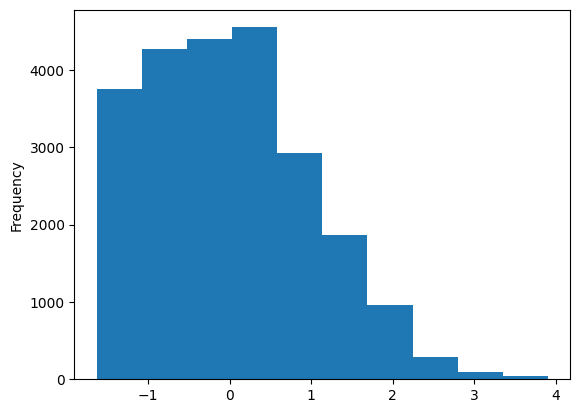

In [23]:
adult["age_z"].plot(kind='hist') #z-score standard deviation ranking

Provide sentence(s) explaining your solution





In [24]:
#adult["index"]= range(adult.shape[0])
adult

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_z
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.,0.039060
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.,0.872307
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.,-0.036690
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.,1.099557
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.,-0.794188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,52,Private,89041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.,1.023807
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.,0.190559
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.,-1.475935
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.,-0.415439


**6. Validate your partition by performing a two-sample Z-test for the difference in proportion of >50k records in the training set versus the proportion of >50k records in the test set?**

In [25]:
#adult.info()

len(adult)

23171

In [26]:
adult['income_bin']=adult.apply(lambda row: 1 if '50K'in row ['income'] else 0, axis=1)

adult


,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_z,income_bin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.,0.039060,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.,0.872307,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.,-0.036690,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.,1.099557,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.,-0.794188,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,52,Private,89041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.,1.023807,1
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.,0.190559,1
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.,-1.475935,1
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.,-0.415439,1


<Axes: ylabel='Frequency'>

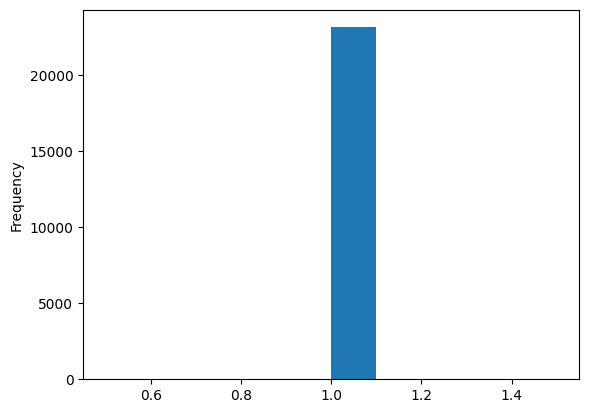

In [29]:
from scipy import stats
adult['income_z']=stats.zscore(adult['income_bin'])


adult["income_bin"].plot(kind='hist')

In [32]:
adult.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,income,age_z,income_bin,income_z
count,23171.000000,2.317100e+04,23171.000000,23171.000000,23171.000000,23171.000000,23171.0,2.317100e+04,23171.0,0.0
mean,38.484355,1.896806e+05,10.121359,1097.237323,87.936818,40.908679,0.0,2.183360e-16,1.0,NaN
std,13.201645,1.053896e+05,2.532471,7493.358253,403.686646,11.942201,0.0,1.000022e+00,0.0,NaN
min,17.000000,1.882700e+04,1.000000,0.000000,0.000000,1.000000,0.0,-1.627435e+00,1.0,NaN
25%,28.000000,1.176810e+05,9.000000,0.000000,0.000000,40.000000,0.0,-7.941875e-01,1.0,NaN
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.0,-1.124396e-01,1.0,NaN
75%,47.000000,2.371685e+05,13.000000,0.000000,0.000000,45.000000,0.0,6.450581e-01,1.0,NaN
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,0.0,3.902298e+00,1.0,NaN


In [31]:
### Show your Code Here ###\
#adult["income"] = adult["income"].apply(lambda x:1 if x ==">50K" else 0)
#adult['income'].value_counts()

#adult.loc[(adult.flag == '>50K.'), 'flag'] = 0
#adult.loc[(adult.flag != '<=50K.' ), 'flag'] = 1
#adult

from scipy import stats
adult['income_z']=stats.zscore(adult['income'])

adult

adult[">50K."].plot(kind='hist')


AttributeError: ignored

Provide sentence(s) explaining your solution

**Please use the following dataset for problems 7 - 8**

In [34]:
import pandas as pd

URL_loan_training='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Training'
URL_loan_test='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Test'

# Split the dataset into training and testing data
loan_test = pd.read_csv(URL_loan_test)
loan_test


,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.00,413,2000,900.0
1,F,0.00,449,1000,450.0
2,F,0.00,454,6000,2700.0
3,F,0.00,456,1000,450.0
4,F,0.00,457,1000,450.0
...,...,...,...,...,...
49693,T,0.38,662,14000,6300.0
49694,T,0.38,664,16000,7200.0
49695,T,0.38,676,4000,1800.0
49696,T,0.38,680,6000,2700.0


In [35]:
loan_training = pd.read_csv(URL_loan_training)


loan_training

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.00,397,1000,450.0
1,F,0.00,403,500,225.0
2,F,0.00,408,1000,450.0
3,F,0.00,408,2000,900.0
4,F,0.00,411,5000,2250.0
...,...,...,...,...,...
150297,T,0.38,709,19000,8550.0
150298,T,0.38,722,17000,7650.0
150299,T,0.38,747,11000,4950.0
150300,T,0.39,679,10000,4500.0


**7. Create a CART model using the training data set that predicts Approval using Debt to Income Ratio, FICO score, and Request Amount. Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file).  Describe the first few splits in the decision tree.  What do the values in the brackets represent?  The sample size for each node?  the Root?**

In [36]:
### Show your Code Here ###
loan_test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49698 entries, 0 to 49697
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Approval              49698 non-null  object 
 1   Debt-to-Income Ratio  49698 non-null  float64
 2   FICO Score            49698 non-null  int64  
 3   Request Amount        49698 non-null  int64  
 4   Interest              49698 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ MB


Provide sentence(s) explaining your solution

**8. Create a CART model using the test data set that uses the same target and predictor variables.  Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file).  Describe the first few splits in the decision tree.  What do the values in the brackets represent?  The sample size for each node?  the Root?  Does the tree built using the test data match the tree built using the training data?**

In [ ]:
### Show your Code Here ###

Provide sentence(s) explaining your solution